In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'pandas'

In [ ]:
dataset = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
print("Data CSV")
print(dataset.head(),"\n")

print("Features CSV")
print(features.head(),"\n")

print("Stores CSV")
print(stores.head())

Data CSV
   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False 

Features CSV
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN   

In [ ]:
print("Data INFO")
print(dataset.info(),"\n")

print("Features INFO")
print(dataset.info(),"\n")

print("Stores INFO")
print(dataset.info())

Data INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None 

Features INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage

In [ ]:
print("Data Shape",dataset.shape)
print("Features Shape",features.shape)
print("Store Shape",stores.shape)

Data Shape (421570, 5)
Features Shape (8190, 12)
Store Shape (45, 3)


In [ ]:
#Merging the Datasets
final_dataset = dataset.merge(features,'right').merge(stores,'left')
final_dataset.head()

Store  Dept        Date  Weekly_Sales IsHoliday  Temperature  Fuel_Price  \
0      1   1.0  2010-02-05      24924.50     False        42.31       2.572   
1      1   2.0  2010-02-05      50605.27     False        42.31       2.572   
2      1   3.0  2010-02-05      13740.12     False        42.31       2.572   
3      1   4.0  2010-02-05      39954.04     False        42.31       2.572   
4      1   5.0  2010-02-05      32229.38     False        42.31       2.572   

   MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  \
0        NaN        NaN        NaN        NaN        NaN  211.096358   
1        NaN        NaN        NaN        NaN        NaN  211.096358   
2        NaN        NaN        NaN        NaN        NaN  211.096358   
3        NaN        NaN        NaN        NaN        NaN  211.096358   
4        NaN        NaN        NaN        NaN        NaN  211.096358   

   Unemployment Type    Size  
0         8.106    A  151315  
1         8.106    A  151315  
2         8.106    A  151315  
3         8.106    A  151315  
4         8.106    A  151315

In [ ]:
final_dataset.shape

(423325, 16)

In [ ]:
#Dropping the columns
final_dataset = final_dataset.drop(['Store','Date','Type'],axis=1)

In [ ]:
#Getting the null values
final_dataset.isna().sum()

Dept              1755
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
Size                 0
dtype: int64

In [ ]:
final_dataset.columns

Index(['Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'],
      dtype='object')

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")
final_dataset = imputer.fit_transform(final_dataset)

In [ ]:
final_dataset = pd.DataFrame(final_dataset,columns=['Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Size'])
final_dataset.head()

Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0   1.0      24924.50        0.0        42.31       2.572    5336.52   
1   2.0      50605.27        0.0        42.31       2.572    5336.52   
2   3.0      13740.12        0.0        42.31       2.572    5336.52   
3   4.0      39954.04        0.0        42.31       2.572    5336.52   
4   5.0      32229.38        0.0        42.31       2.572    5336.52   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0     194.67      24.83    1465.54    3340.02  211.096358         8.106   
1     194.67      24.83    1465.54    3340.02  211.096358         8.106   
2     194.67      24.83    1465.54    3340.02  211.096358         8.106   
3     194.67      24.83    1465.54    3340.02  211.096358         8.106   
4     194.67      24.83    1465.54    3340.02  211.096358         8.106   

       Size  
0  151315.0  
1  151315.0  
2  151315.0  
3  151315.0  
4  151315.0

In [ ]:
final_dataset.isna().sum()

Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Size            0
dtype: int64

In [ ]:
#Get dummies
final_dataset = pd.get_dummies(final_dataset)
final_dataset.head()

Dept  Weekly_Sales  IsHoliday  Temperature  Fuel_Price  MarkDown1  \
0   1.0      24924.50        0.0        42.31       2.572    5336.52   
1   2.0      50605.27        0.0        42.31       2.572    5336.52   
2   3.0      13740.12        0.0        42.31       2.572    5336.52   
3   4.0      39954.04        0.0        42.31       2.572    5336.52   
4   5.0      32229.38        0.0        42.31       2.572    5336.52   

   MarkDown2  MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  \
0     194.67      24.83    1465.54    3340.02  211.096358         8.106   
1     194.67      24.83    1465.54    3340.02  211.096358         8.106   
2     194.67      24.83    1465.54    3340.02  211.096358         8.106   
3     194.67      24.83    1465.54    3340.02  211.096358         8.106   
4     194.67      24.83    1465.54    3340.02  211.096358         8.106   

       Size  
0  151315.0  
1  151315.0  
2  151315.0  
3  151315.0  
4  151315.0

In [ ]:
#Getting the coorelation
corr = final_dataset.corr()['Weekly_Sales']
corr

Dept            0.148337
Weekly_Sales    1.000000
IsHoliday       0.012703
Temperature    -0.001850
Fuel_Price     -0.000848
MarkDown1       0.051875
MarkDown2       0.019745
MarkDown3       0.037662
MarkDown4       0.033217
MarkDown5       0.052858
CPI            -0.021185
Unemployment   -0.025203
Size            0.243373
Name: Weekly_Sales, dtype: float64

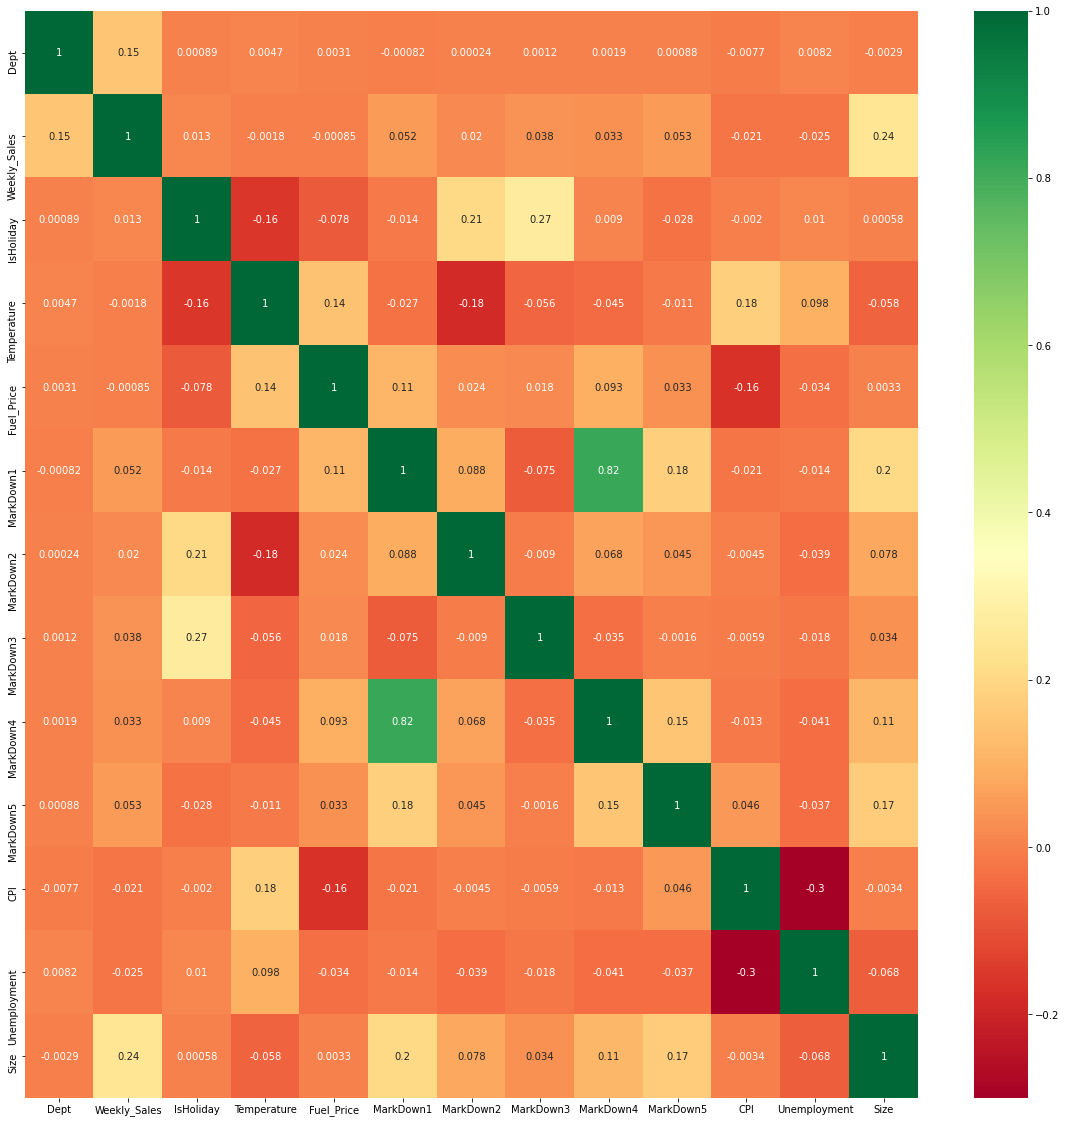

In [ ]:
#Plotting Coorelation using Heatmap
plt.figure(figsize=(20,20))
g = sns.heatmap(final_dataset.corr(),annot=True, cmap="RdYlGn")

In [ ]:
from sklearn.model_selection import train_test_split
X = final_dataset.drop('Weekly_Sales',axis=1)
y = final_dataset['Weekly_Sales']
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
######Feature Importance#######
model = ExtraTreesRegressor()  #This Regression Algorithm will help you in finding out the best features
model.fit(X,y)

In [ ]:
#Plotting the Graph For better visualization
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Implementing best models to get the best prediction/least Error

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr_reg = LinearRegression()
lr_reg.fit(x_train,y_train)
y_pred = lr_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

21803.01559930539

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_reg = DecisionTreeRegressor()
dec_reg.fit(x_train,y_train)
y_pred = dec_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

6772.829267602523

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
y_pred = rf_reg.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

5076.288010692709

In [ ]:
from sklearn.model_selection import cross_val_score 

#Getting Cross Validation scores of Models

#For Linear Regression
scores = cross_val_score(lr_reg, x_test, y_test, scoring = 'neg_mean_squared_error',cv = 10)
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std Deviation: ", scores.std())

Scores:  [-4.68461202e+08 -4.86419870e+08 -4.49733610e+08 -4.62310493e+08
 -4.61895543e+08 -4.76432944e+08 -4.76680579e+08 -4.69830211e+08
 -4.96212192e+08 -5.06042312e+08]
Mean:  -475401895.6125806
Std Deviation:  16086893.829223216


In [ ]:
#For Decision Tree 
scores = cross_val_score(dec_reg, x_test, y_test, scoring = 'neg_mean_squared_error',cv = 10)
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std Deviation: ", scores.std())

Scores:  [-69446038.8285482  -64773371.40888786 -59736235.71373896
 -68741227.09656414 -71672088.4483034  -52166024.12831899
 -59384675.57873249 -76853159.04790704 -80872232.05452219
 -73019579.88345769]
Mean:  -67666463.21889809
Std Deviation:  8294098.601192209


In [ ]:
#For Random Forest
scores = cross_val_score(rf_reg, x_test[:4000], y_test[:4000], scoring = 'neg_mean_squared_error',cv = 10)
print("Scores: ", scores)
print("Mean: ", scores.mean())
print("Std Deviation: ", scores.std())

Scores:  [-9.00400895e+07 -7.81637803e+07 -1.14328626e+08 -6.36055823e+07
 -8.92310149e+07 -1.05592024e+08 -2.18231530e+08 -8.23600453e+07
 -1.07615314e+08 -9.11527094e+07]
Mean:  -104032071.60165048
Std Deviation:  40640717.724874824


In [ ]:
#By looking at above results we decide to use Random Forest Model

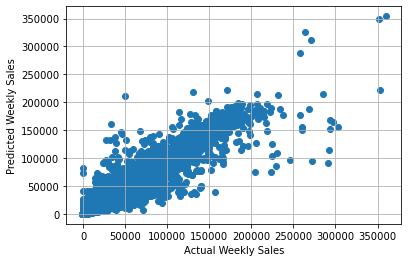

In [ ]:
plt.bar(y_test, y_pred)
plt.xlabel('Actual Weekly Sales')
plt.ylabel('Predicted Weekly Sales')
# plt.grid(True)

In [ ]:
#Making a Dataframe for the predicted sales
pred_dataset = pd.DataFrame(np.c_[y_test,y_pred], columns=["Original Sales","Predicted Sales"])
pred_dataset.head(100)

Original Sales  Predicted Sales
0         14504.03       13681.6805
1         52333.02       44911.4739
2         16391.23       17526.0328
3          2281.88        2433.3089
4          1812.00        1313.8310
..             ...              ...
95        23080.96       25113.7067
96          940.00        1815.2808
97         2747.55        1653.2450
98          803.50         674.8808
99        84605.43      101067.3693

[100 rows x 2 columns]

In [ ]:
import sklearn
print("The Accuracy of the model is: ",sklearn.metrics.r2_score(y_test, y_pred)*100)

The Accuracy of the model is:  95.03746432585635
